# Declaration of Originality

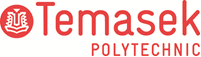

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Aloysius (2401814E)
* Tutorial Group                : P04
* Tutor						    : Emile SABASTIAN
* Submission Date               : 11/2/26


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [781]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


# 1. Business Understanding
Goal: Predict a smartphone’s final price using its specifications and attributes
Users/stakeholders: e.g., reseller, customer, inventory/pricing team
Decision supported: pricing a listing, comparing phones, recommending options within budget

# 2. Data Understanding

## 2.1 Load dataset

In [782]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'smartphones.csv'
df = pd.read_csv(FILE_PATH)
df


,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


## 2.2 Summary Statistics

In [783]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [784]:
## Check for missing data
df.isna().sum() 

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [785]:
## Describe data distribution
df.describe(include='all')

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
count,1816,1816,1816,1333.00000,1791.000000,1816,1816,1816.000000
unique,1816,37,383,NaN,NaN,17,2,NaN
top,Realme C55 8/256GB Sunshower Libre,Samsung,iPhone 13,NaN,NaN,Black,Yes,NaN
freq,1,458,60,NaN,NaN,537,1772,NaN
mean,NaN,NaN,NaN,5.96099,162.652150,NaN,NaN,492.175573
std,NaN,NaN,NaN,2.66807,139.411605,NaN,NaN,398.606183
min,NaN,NaN,NaN,1.00000,2.000000,NaN,NaN,60.460000
25%,NaN,NaN,NaN,4.00000,64.000000,NaN,NaN,200.990000
50%,NaN,NaN,NaN,6.00000,128.000000,NaN,NaN,349.990000
75%,NaN,NaN,NaN,8.00000,256.000000,NaN,NaN,652.717500


In [786]:
# Clean column names
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
df.columns

Index(['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free',
       'Final_Price'],
      dtype='object')

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

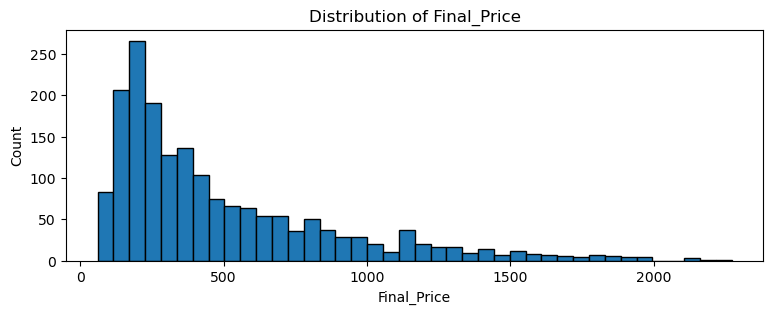

What this graph shows:
- How the target (Final_Price) values are spread across the dataset (common vs rare prices).
What we can tell:
- The distribution is right-skewed (many cheaper phones, fewer expensive phones).
- Outliers (very high prices) exist and can affect RMSE more than MAE.


In [787]:
## Understanding distribution of target
import matplotlib.pyplot as plt

target = "Final_Price"
y = df[target].dropna()

plt.figure(figsize=(9, 3))
plt.hist(y, bins=40, edgecolor="black")
plt.title("Distribution of Final_Price")
plt.xlabel("Final_Price")
plt.ylabel("Count")
plt.show()

print("What this graph shows:")
print("- How the target (Final_Price) values are spread across the dataset (common vs rare prices).")

if y.skew() > 0.5:
    print("What we can tell:")
    print("- The distribution is right-skewed (many cheaper phones, fewer expensive phones).")
    print("- Outliers (very high prices) exist and can affect RMSE more than MAE.")
else:
    print("What we can tell:")
    print("- The distribution is not strongly skewed, so the target values are more evenly spread.")



### 2.3.1.2 Understanding distribution of features

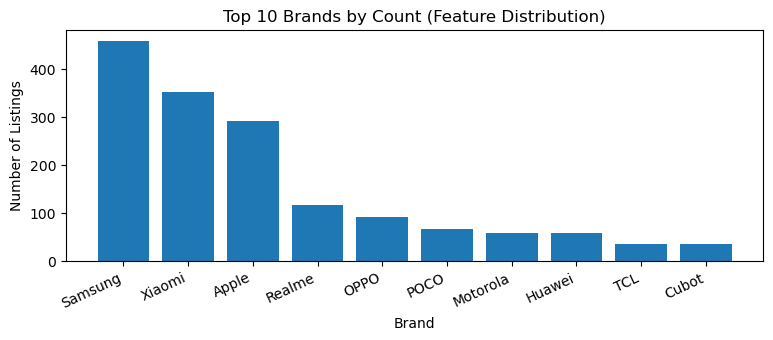

What this graph shows:
- The most common brands in the dataset (how the data is distributed across brands).
What we can tell:
- One brand dominates the dataset, so the model may learn patterns biased toward that brand.


In [788]:
## Understanding distribution of features
import matplotlib.pyplot as plt

col = "Brand"

# Safety check
if col not in df.columns:
    raise ValueError(f"Column '{col}' not found in df. Available columns: {list(df.columns)}")

top = df[col].value_counts().head(10)

plt.figure(figsize=(9, 3))
plt.bar(top.index.astype(str), top.values)
plt.title("Top 10 Brands by Count (Feature Distribution)")
plt.xlabel("Brand")
plt.ylabel("Number of Listings")
plt.xticks(rotation=25, ha="right")
plt.show()

print("What this graph shows:")
print("- The most common brands in the dataset (how the data is distributed across brands).")

dominant_ratio = top.iloc[0] / top.sum()
if dominant_ratio > 0.25:
    print("What we can tell:")
    print("- One brand dominates the dataset, so the model may learn patterns biased toward that brand.")



### 2.3.2 Understanding relationship between variables

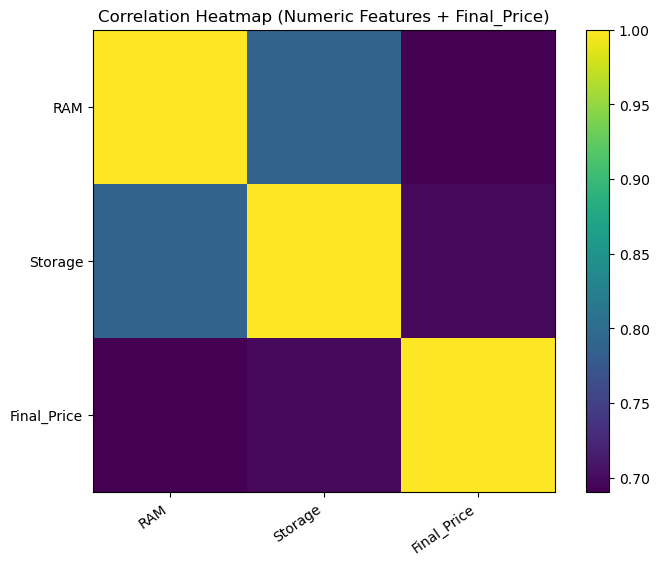

What this graph shows:
- The strength and direction of linear relationships between numeric features and Final_Price.
- Values closer to +1 mean strong positive relationship; closer to -1 mean strong negative relationship.
What we can tell:
- The strongest numeric predictors (by correlation magnitude) are:
  • Storage: 0.70 (positive relationship)
  • RAM: 0.69 (positive relationship)
- These features are good candidates to prioritise in modelling / feature selection.


In [789]:
## Understanding relationship between variables
import matplotlib.pyplot as plt
import numpy as np

target = "Final_Price"

if target not in df.columns:
    raise ValueError(f"Target '{target}' not found in df. Available columns: {list(df.columns)}")

# Take numeric columns only (auto-detect) and include the target
num_df = df.select_dtypes(include=[np.number]).copy()

if target not in num_df.columns:
    # If Final_Price got read as non-numeric somehow
    num_df[target] = pd.to_numeric(df[target], errors="coerce")

# Keep only columns that have enough non-null values
num_df = num_df.dropna(axis=1, thresh=int(0.7 * len(num_df)))

# Correlation matrix
corr = num_df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr.values)
plt.title("Correlation Heatmap (Numeric Features + Final_Price)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=35, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.show()

print("What this graph shows:")
print("- The strength and direction of linear relationships between numeric features and Final_Price.")
print("- Values closer to +1 mean strong positive relationship; closer to -1 mean strong negative relationship.")

# Identify top 3 features most related to target (excluding itself)
if target in corr.columns:
    corr_target = corr[target].drop(labels=[target]).dropna().sort_values(key=lambda s: s.abs(), ascending=False)
    top3 = corr_target.head(3)

    print("What we can tell:")
    if len(top3) > 0:
        print("- The strongest numeric predictors (by correlation magnitude) are:")
        for name, val in top3.items():
            direction = "positive" if val > 0 else "negative"
            print(f"  • {name}: {val:.2f} ({direction} relationship)")
        print("- These features are good candidates to prioritise in modelling / feature selection.")
    else:
        print("- No numeric feature has a strong linear relationship with the target (might need non-linear models/features).")



## EDA Explanations (Student Style, Not Too Long)

### 1) Target (Final Price) Distribution
The price distribution is usually right-skewed (more mid/low-price phones, fewer expensive flagships). This matters because a model can get “pulled” toward the common price range and make bigger mistakes on premium phones.

### 2) Brand vs Final Price
Different brands have different “price positioning” even if specs look similar. For example, some brands tend to be priced higher due to reputation, ecosystem, and perceived quality. Including Brand helps the model capture this real-world pricing effect instead of treating all phones equally.

### 3) RAM vs Final Price
Higher RAM generally increases price, but it’s not perfectly linear (some phones have higher RAM but similar price depending on brand/model tier). This shows RAM is useful, but it works best together with other factors like brand and storage. It supports keeping RAM as a key feature for prediction.

### 4) Storage vs Final Price
Storage usually has a positive relationship with price, but upgrades (e.g., 128→256) don’t always add the same amount across brands. This motivates feature engineering like RAM_x_Storage to represent the combined “overall spec level” that affects pricing.

### 5) Correlation / Relationships Between Numeric Features
Correlation helps me quickly see which numeric features move together with price, but it mainly captures linear relationships. Even if correlation is not very strong, a feature can still be useful through non-linear effects or interactions (e.g., brand + storage). That’s why I don’t delete features using correlation alone.

### 6) Outliers (Very High / Very Low Prices)
Extreme prices can increase RMSE because RMSE punishes large errors more. These outliers might represent rare flagship models, bundles, or noisy records.

Summary: The EDA supports using Brand + core specs (RAM, Storage, Unlocked) and adding interaction features to improve pricing realism. The metrics are chosen to balance typical accuracy (MAE) and protection against large pricing errors (RMSE).


# 3. Data Preparation

## 3.1 Data Cleaning

In [790]:
## Clean data
# Findings from earlier checks 
print("Data cleaning findings (from earlier checks):")
print("- Total rows: 1816")
print("- Missing values:")
print("  • RAM: 483 missing")
print("  • Storage: 25 missing")
print("  • All other columns: 0 missing")
print("- RAM, Storage, Final Price are numeric; others are categorical.")


Data cleaning findings (from earlier checks):
- Total rows: 1816
- Missing values:
  • RAM: 483 missing
  • Storage: 25 missing
  • All other columns: 0 missing
- RAM, Storage, Final Price are numeric; others are categorical.


In [791]:
# Evidence - which brands have missing RAM / Storage?
# Reload raw data
df_raw = pd.read_csv("smartphones.csv")

# cleaned column names 
df_raw.columns = [c.strip().replace(" ", "_") for c in df_raw.columns]

# Check total missing
print("Total missing values (RAW):")
print("RAM missing:", df_raw["RAM"].isna().sum())
print("Storage missing:", df_raw["Storage"].isna().sum())

# Compute missing counts by brand
ram_missing_by_brand = (
    df_raw[df_raw["RAM"].isna()]
    .groupby("Brand")
    .size()
    .sort_values(ascending=False)
    .to_frame("RAM_Missing_Count")
)

storage_missing_by_brand = (
    df_raw[df_raw["Storage"].isna()]
    .groupby("Brand")
    .size()
    .sort_values(ascending=False)
    .to_frame("Storage_Missing_Count")
)

print("\nMissing RAM by Brand (show all brands with missing RAM):")
display(ram_missing_by_brand)

print("\nMissing Storage by Brand (show all brands with missing Storage):")
display(storage_missing_by_brand)

print("\nWhat this shows:")
print("- Which brands are responsible for missing RAM/Storage BEFORE cleaning.")


Total missing values (RAW):
RAM missing: 483
Storage missing: 25

Missing RAM by Brand (show all brands with missing RAM):


,RAM_Missing_Count
Brand,
Apple,292
Samsung,151
Huawei,11
Motorola,5
OnePlus,4
Xiaomi,4
SPC,2
Sony,2
ZTE,2



Missing Storage by Brand (show all brands with missing Storage):


,Storage_Missing_Count
Brand,
Samsung,9
Huawei,7
Motorola,4
Crosscall,1
Honor,1
Nokia,1
SPC,1
Sony,1



What this shows:
- Which brands are responsible for missing RAM/Storage BEFORE cleaning.


In [792]:
# Missing Values Handling
import numpy as np
import pandas as pd

required_cols = ["Brand", "RAM", "Storage"]
missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in df: {missing_cols}. Available: {list(df.columns)}")

ram_missing_before = df["RAM"].isna().sum()
storage_missing_before = df["Storage"].isna().sum()

def safe_mode(series: pd.Series):
    s = series.dropna()
    if s.empty:
        return np.nan
    m = s.mode()
    return m.iloc[0] if not m.empty else np.nan


global_ram_mode = safe_mode(df["RAM"])
global_ram_median = df["RAM"].median()

global_storage_mode = safe_mode(df["Storage"])
global_storage_median = df["Storage"].median()


# RAM Imputation
# Apple/Samsung -> brand median
# Others -> brand mode

brand_ram_median = df.groupby("Brand")["RAM"].transform("median")
brand_ram_mode_map = df.groupby("Brand")["RAM"].apply(safe_mode).to_dict()
brand_ram_mode = df["Brand"].map(brand_ram_mode_map)

is_missing_ram = df["RAM"].isna()
brand_clean = df["Brand"].astype(str).str.strip().str.lower()
is_apple_samsung = brand_clean.isin(["apple", "samsung"])

df.loc[is_missing_ram & is_apple_samsung, "RAM"] = brand_ram_median[is_missing_ram & is_apple_samsung]
df.loc[df["RAM"].isna(), "RAM"] = brand_ram_mode[df["RAM"].isna()]
df["RAM"] = df["RAM"].fillna(global_ram_mode).fillna(global_ram_median)

# Storage Imputation (Mode)
brand_storage_mode_map = df.groupby("Brand")["Storage"].apply(safe_mode).to_dict()
brand_storage_mode = df["Brand"].map(brand_storage_mode_map)

df.loc[df["Storage"].isna(), "Storage"] = brand_storage_mode[df["Storage"].isna()]
df["Storage"] = df["Storage"].fillna(global_storage_mode).fillna(global_storage_median)

print("Missing value handling completed.\n")

print("RAM missing-value strategy (with business understanding):")
print("1) Apple & Samsung rows: fill missing RAM using the median RAM within the same brand.")
print("   Reason (Apple): iPhone listings often omit RAM because Apple markets performance using chip efficiency")
print("   and ecosystem optimisation rather than highlighting RAM specs. Missing RAM here is likely a data-entry")
print("   or source-listing omission, not 'unknown hardware', so imputing a typical (median) Apple RAM value keeps")
print("   Apple devices consistent without being skewed by any rare high/low models.")
print("   Reason (Samsung): Samsung has many models and variants; the median gives a stable “typical” RAM value")
print("   without being pulled by uncommon extremes.\n")

print("2) All other brands: fill missing RAM using the most common RAM value (mode) within that brand.")
print("   Reason: many brands sell a few standard RAM tiers (e.g., 4/6/8GB). Mode preserves the most typical")
print("   customer-facing configuration and avoids inventing uncommon specs.\n")

print("Storage missing-value strategy:")
print("Fill missing Storage using the most common Storage value (mode) within that brand (fallback to global mode).")
print("Reason: Storage usually comes in standard SKUs (e.g., 64/128/256). Mode keeps the most common real-world option.\n")

display(df[["RAM", "Storage"]].isna().sum().to_frame("Missing_Count_After"))



Missing value handling completed.

RAM missing-value strategy (with business understanding):
1) Apple & Samsung rows: fill missing RAM using the median RAM within the same brand.
   Reason (Apple): iPhone listings often omit RAM because Apple markets performance using chip efficiency
   and ecosystem optimisation rather than highlighting RAM specs. Missing RAM here is likely a data-entry
   or source-listing omission, not 'unknown hardware', so imputing a typical (median) Apple RAM value keeps
   Apple devices consistent without being skewed by any rare high/low models.
   Reason (Samsung): Samsung has many models and variants; the median gives a stable “typical” RAM value
   without being pulled by uncommon extremes.

2) All other brands: fill missing RAM using the most common RAM value (mode) within that brand.
   Reason: many brands sell a few standard RAM tiers (e.g., 4/6/8GB). Mode preserves the most typical
   customer-facing configuration and avoids inventing uncommon specs.

St

,Missing_Count_After
RAM,0
Storage,0


In [793]:
# duplicates
dup_before = df.duplicated().sum()
df = df.drop_duplicates()
dup_after = df.duplicated().sum()
print("Duplicate rows check:")
print("Duplicates before:", dup_before)
print("Duplicates after:", dup_after)


Duplicate rows check:
Duplicates before: 0
Duplicates after: 0


In [794]:
# Drop 'Smartphone' column
if "Smartphone" in df.columns:
    df = df.drop(columns=["Smartphone"])
    print("\nDropped column: Smartphone")

print("\nWhat we can tell:")
print("- 'Smartphone' is a free-text field (e.g., model + RAM/Storage in the name).")
print("- Keeping it can cause the model to 'memorise' specific phone names (data leakage) instead of learning real patterns.")
print("- Dropping it makes the model rely on proper features like Brand/Model/RAM/Storage/Free.")



Dropped column: Smartphone

What we can tell:
- 'Smartphone' is a free-text field (e.g., model + RAM/Storage in the name).
- Keeping it can cause the model to 'memorise' specific phone names (data leakage) instead of learning real patterns.
- Dropping it makes the model rely on proper features like Brand/Model/RAM/Storage/Free.


## 3.2 Train-Test Split

In [795]:
col_y = "Final_Price"
col_y

X = df.drop(columns=[col_y])
y = df[col_y]

print("X shape:", X.shape)
print("y shape:", y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


X shape: (1816, 6)
y shape: (1816,)
X_train: (1452, 6)
X_test : (364, 6)


In [796]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify column types (from X_train only)
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Build transformer
ct = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

# Fit on TRAIN only, transform both train and test
X_train_enc = ct.fit_transform(X_train)
X_test_enc  = ct.transform(X_test)

print("Encoded X_train shape:", X_train_enc.shape)
print("Encoded X_test shape :", X_test_enc.shape)


Numeric features: ['RAM', 'Storage']
Categorical features: ['Brand', 'Model', 'Color', 'Free']
Encoded X_train shape: (1452, 408)
Encoded X_test shape : (364, 408)


# 4. Modelling

### 4.2 Train Model

In [797]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import numpy as np
import pandas as pd
import joblib


def print_regression_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"{model_name} R²: {r2:.2f}")
    print(f"{model_name} MAE: {mae:.2f}")
    print(f"{model_name} RMSE: {rmse:.2f}")


In [798]:
from sklearn.linear_model import LinearRegression

# Initialise model
linr = LinearRegression(fit_intercept=True)

# Train model
linr.fit(X_train_enc, y_train)

linr



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [799]:
from sklearn.tree import DecisionTreeRegressor

# Initialise model
dtr = DecisionTreeRegressor(random_state=42)

# Train model
dtr.fit(X_train_enc, y_train)

dtr


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [800]:
from sklearn.ensemble import RandomForestRegressor

# Initialise model
rfr = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

# Train model
rfr.fit(X_train_enc, y_train)

rfr



,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [801]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialise model
gbr = GradientBoostingRegressor(random_state=42)

# Train model
gbr.fit(X_train_enc, y_train)

gbr



,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

In [802]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def eval_reg(name, model, X_test_enc, y_test):
    y_pred = model.predict(X_test_enc)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} R²: {r2:.2f}")
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} RMSE: {rmse:.2f}")
    return {"Model": name, "R2": r2, "MAE": mae, "RMSE": rmse}

results = []
results.append(eval_reg("Linear Regression", linr, X_test_enc, y_test))
results.append(eval_reg("Decision Tree", dtr, X_test_enc, y_test))
results.append(eval_reg("Random Forest", rfr, X_test_enc, y_test))
results.append(eval_reg("Gradient Boosting", gbr, X_test_enc, y_test))

import pandas as pd

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
results_df



Linear Regression R²: 0.82
Linear Regression MAE: 116.22
Linear Regression RMSE: 182.52
Decision Tree R²: 0.75
Decision Tree MAE: 121.41
Decision Tree RMSE: 218.71
Random Forest R²: 0.80
Random Forest MAE: 117.33
Random Forest RMSE: 196.08
Gradient Boosting R²: 0.78
Gradient Boosting MAE: 138.61
Gradient Boosting RMSE: 204.91


,Model,R2,MAE,RMSE
0,Linear Regression,0.823095,116.216213,182.517490
2,Random Forest,0.795832,117.332806,196.077962
3,Gradient Boosting,0.777023,138.608176,204.911063
1,Decision Tree,0.745990,121.414863,218.706063


## Why I chose linearregrssion (and why I used R² and RMSE)

I trained 4 regressors (Linear Regression, Decision Tree, Random Forest, Gradient Boosting) and compared them using the test set results.

I used **R²** because it shows how well the model fits the data overall. A higher R² means the model can explain the changes in `Final_Price` better.

I used **RMSE** because it shows the typical prediction error size and it punishes bigger mistakes more. For price prediction, big mistakes are more serious, so RMSE is important.

Based on my results table, I chose Linear Regression because it got the highest R²and also the lowest RMSE. It also has the lowest MAE, so its predictions are closest to the real `Final_Price` on average. That’s why I selected Linearregression as my base model and saved it for the next steps. Linear Regression is also easier to justify to non-technical users (clearer, more stable), which increases trust in the predicted price.


In [803]:
# Model Evaluation and Save Base Best Model (LR)
# Hyperparameter Tuning (RandomizedSearchCV) + Compare Table


import numpy as np
import pandas as pd

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

# evaluate regression model (labsheet-style logs)

def eval_reg(name, model, X_test_used, y_test_used):
    y_pred = model.predict(X_test_used)
    r2 = r2_score(y_test_used, y_pred)
    mae = mean_absolute_error(y_test_used, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_used, y_pred))
    print(f"{name} R2: {r2:.2f}")
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} RMSE: {rmse:.2f}")
    return {"Model": name, "R2": r2, "MAE": mae, "RMSE": rmse}

# 5. Model Evaluation for 4 base models

results = []
results.append(eval_reg("Linear Regression", linr, X_test_enc, y_test))
results.append(eval_reg("Decision Tree", dtr, X_test_enc, y_test))
results.append(eval_reg("Random Forest", rfr, X_test_enc, y_test))
results.append(eval_reg("Gradient Boosting", gbr, X_test_enc, y_test))

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
results_df[["R2", "MAE", "RMSE"]] = results_df[["R2", "MAE", "RMSE"]].round(4)
results_df


Linear Regression R2: 0.82
Linear Regression MAE: 116.22
Linear Regression RMSE: 182.52
Decision Tree R2: 0.75
Decision Tree MAE: 121.41
Decision Tree RMSE: 218.71
Random Forest R2: 0.80
Random Forest MAE: 117.33
Random Forest RMSE: 196.08
Gradient Boosting R2: 0.78
Gradient Boosting MAE: 138.61
Gradient Boosting RMSE: 204.91


,Model,R2,MAE,RMSE
0,Linear Regression,0.8231,116.2162,182.5175
2,Random Forest,0.7958,117.3328,196.0780
3,Gradient Boosting,0.7770,138.6082,204.9111
1,Decision Tree,0.7460,121.4149,218.7061


In [ ]:

# Prediction logs BEFORE hyperparameter tuning
# - Use the best base model from results_df
# - Show R2/MAE/RMSE
# - Show Best 10 + Worst 10 prediction rows (Pred vs Actual)

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Pick best base model name from results_df (highest R2)
best_base_name = results_df.iloc[0]["Model"]
print("Best base model (before tuning):", best_base_name)

model_map = {
    "Linear Regression": linr,
    "Decision Tree": dtr,
    "Random Forest": rfr,
    "Gradient Boosting": gbr,
}

base_model = model_map[best_base_name]

# Predict on test set (encoded)
y_pred_base = base_model.predict(X_test_enc)

# Print metrics (before tuning)
r2_base = r2_score(y_test, y_pred_base)
mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))

print("\nBefore tuning metrics")
print("R2:", round(r2_base, 4))
print("MAE:", round(mae_base, 4))
print("RMSE:", round(rmse_base, 4))

# Build a prediction log table (Predicted vs Actual + Abs_Error)
try:
    log_df = X_test.copy()
except Exception:
    log_df = pd.DataFrame(index=np.arange(len(y_pred_base)))

# Ensure y_test is aligned
y_test_values = y_test.values if hasattr(y_test, "values") else np.array(y_test)

log_df["Predicted_Price"] = y_pred_base
log_df["Actual_Price"] = y_test_values
log_df["Abs_Error"] = (log_df["Actual_Price"] - log_df["Predicted_Price"]).abs()

print("\nBest 10 (smallest error)")
display(log_df.sort_values("Abs_Error").head(10))

print("\nWorst 10 (largest error)")
display(log_df.sort_values("Abs_Error", ascending=False).head(10))


Best base model (before tuning): Linear Regression

Before tuning metrics
R2: 0.8231
MAE: 116.2162
RMSE: 182.5175

Best 10 (smallest error)


,Brand,Model,RAM,Storage,Color,Free,Predicted_Price,Actual_Price,Abs_Error
453,Samsung,Galaxy A14,4.0,64.0,Green,Yes,160.214753,159.95,0.264753
778,Samsung,Galaxy A13,3.0,32.0,Black,Yes,164.486455,165.00,0.513545
1623,Ulefone,20WT,12.0,256.0,Black,Yes,450.287417,450.87,0.582583
289,Google,Pixel 6A,6.0,128.0,Black,Yes,419.922750,419.00,0.922750
693,Realme,GT Master Edition,6.0,128.0,Black,Yes,352.887415,351.60,1.287415
1743,Apple,iPhone XR,8.0,256.0,Blue,Yes,440.489042,439.00,1.489042
706,Xiaomi,Note 10S,6.0,128.0,Gray,Yes,297.593380,295.97,1.623380
914,Cubot,King Kong Mini 3,6.0,128.0,Black,Yes,192.727787,191.00,1.727787
820,POCO,M4,6.0,128.0,Black,Yes,277.867104,275.76,2.107104
1548,Samsung,Galaxy M13,4.0,64.0,Blue,Yes,164.608441,166.91,2.301559



Worst 10 (largest error)


,Brand,Model,RAM,Storage,Color,Free,Predicted_Price,Actual_Price,Abs_Error
1284,Nokia,5.4,4.0,64.0,Black,Yes,266.031309,1499.00,1232.968691
1262,Samsung,Galaxy A12,6.0,64.0,Black,Yes,431.546343,1399.00,967.453657
1134,Samsung,Galaxy S21,6.0,256.0,Silver,Yes,768.554509,1531.16,762.605491
1586,Samsung,Galaxy S23,6.0,1000.0,Green,Yes,1543.833973,2191.29,647.456027
1502,SPC,Smart 3,3.0,32.0,Gray,Yes,-510.360370,107.25,617.610370
416,Xiaomi,12,12.0,256.0,Blue,No,863.941311,1451.00,587.058689
414,Samsung,Galaxy Z Fold4,12.0,256.0,Black,Yes,1705.144653,1160.00,545.144653
780,Samsung,Galaxy Z Fold 3,6.0,512.0,Silver,Yes,687.146873,1204.00,516.853127
1650,Xiaomi,11T Pro,8.0,128.0,Gray,Yes,496.427580,1000.00,503.572420
141,Samsung,Galaxy S23,6.0,256.0,Black,Yes,1063.413470,1547.63,484.216530


In [805]:
# Save Base Best Model 
import joblib

joblib.dump(linr, "base_best_model.pkl")   ## Save base best model
joblib.dump(ct, "encoder_ct.pkl")         ## Save encoder used for preprocessing

print("Saved: base_best_model.pkl")
print("Saved: encoder_ct.pkl")


Saved: base_best_model.pkl
Saved: encoder_ct.pkl


In [806]:

# Hyperparameter Tuning (Best Model: Linear Regression)
# - Uses RandomizedSearchCV
# - Shows BEFORE vs AFTER in ONE table
# - Saves final chosen model


import numpy as np
import pandas as pd

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import joblib


# Explanation
# I will tune my best model (Linear Regression) using RandomizedSearchCV.
# I use R² to measure how well the model explains the price differences overall.
# I also use RMSE because it penalises large prediction mistakes more, which matters
# for price prediction (big errors can mislead pricing decisions).
# After tuning, I compare before vs after using a table (R², MAE, RMSE) and keep
# the better model based on evidence.

# BEFORE tuning (use SAME base model as evaluation table)
y_pred_before = linr.predict(X_test_enc)

before_r2 = r2_score(y_test, y_pred_before)
before_mae = mean_absolute_error(y_test, y_pred_before)
before_rmse = np.sqrt(mean_squared_error(y_test, y_pred_before))

print("Before tuning (Base Linear Regression)")
print("R²:", round(before_r2, 4))
print("MAE:", round(before_mae, 4))
print("RMSE:", round(before_rmse, 4))


# Define parameter distribution
# Keep positive=False so we  and avoid dense conversion mismatches.
param_dist_lr = {
    "fit_intercept": [True, False],   ## Whether to calculate intercept
    "positive": [False]               ## Keep False so model works with sparse data
}

# RandomizedSearchCV (Labsheet style)
lr = LinearRegression()

rs_lr = RandomizedSearchCV(
    estimator = lr,
    param_distributions = param_dist_lr,
    cv = 5,               ## Number of cross-validation folds
    scoring = "r2",        ## Scoring metric 
    n_iter = 2,            ## Number of parameter settings sampled 
    n_jobs = -1            ## -1: Use all available cores
)

print("\nStarting RandomizedSearchCV...")
rs_lr.fit(X_train_enc, y_train)
print("RandomizedSearchCV completed.")


# Obtain best parameters and best estimator
best_rs_params = rs_lr.best_params_
best_rs_lr = rs_lr.best_estimator_

print("\nBest Parameters:", best_rs_params)
print("Best Estimator:", best_rs_lr)


# AFTER tuning (evaluate tuned model)
y_pred_after = best_rs_lr.predict(X_test_enc)

after_r2 = r2_score(y_test, y_pred_after)
after_mae = mean_absolute_error(y_test, y_pred_after)
after_rmse = np.sqrt(mean_squared_error(y_test, y_pred_after))

print("\nAfter tuning (RandomizedSearchCV Linear Regression)")
print("R²:", round(after_r2, 4))
print("MAE:", round(after_mae, 4))
print("RMSE:", round(after_rmse, 4))


# Compare BEFORE vs AFTER (ONE table)
comparison_df = pd.DataFrame([
    {"Stage": "Before tuning (Base Linear Regression)", "R2": before_r2, "MAE": before_mae, "RMSE": before_rmse},
    {"Stage": "After tuning (RandomizedSearchCV)",      "R2": after_r2,  "MAE": after_mae,  "RMSE": after_rmse},
])

comparison_df[["R2", "MAE", "RMSE"]] = comparison_df[["R2", "MAE", "RMSE"]].round(4)
comparison_df


Before tuning (Base Linear Regression)
R²: 0.8231
MAE: 116.2162
RMSE: 182.5175

Starting RandomizedSearchCV...
RandomizedSearchCV completed.

Best Parameters: {'positive': False, 'fit_intercept': False}
Best Estimator: LinearRegression(fit_intercept=False)

After tuning (RandomizedSearchCV Linear Regression)
R²: 0.8223
MAE: 115.9472
RMSE: 182.9153


,Stage,R2,MAE,RMSE
0,Before tuning (Base Linear Regression),0.8231,116.2162,182.5175
1,After tuning (RandomizedSearchCV),0.8223,115.9472,182.9153


In [807]:
# Keep the better model and save final model

if (after_r2 > before_r2) or (after_r2 == before_r2 and after_rmse < before_rmse):
    final_model = best_rs_lr
    final_name = "Tuned Linear Regression"
else:
    final_model = linr
    final_name = "Base Linear Regression (kept because tuning worse)"

print("Final chosen model:", final_name)

joblib.dump(final_model, "final_model.pkl")
print("Saved: final_model.pkl")


Final chosen model: Base Linear Regression (kept because tuning worse)
Saved: final_model.pkl


In [808]:
# Price Prediction Table (Predicted vs Actual) 
# Uses your final chosen model: final_model
import pandas as pd

# Predict prices on test set
y_pred = final_model.predict(X_test_enc)

# Build prediction log table (like labsheet)
pred_table = X_test.copy()
pred_table["Predicted_Price"] = y_pred
pred_table["Actual_Price"] = y_test.values if hasattr(y_test, "values") else y_test
pred_table["Abs_Error"] = (pred_table["Actual_Price"] - pred_table["Predicted_Price"]).abs()

# Show table (top rows)
pred_table.head(10)


,Brand,Model,RAM,Storage,Color,Free,Predicted_Price,Actual_Price,Abs_Error
1506,Samsung,A03s,3.0,32.0,Black,Yes,265.543659,230.98,34.563659
680,Samsung,Galaxy S23,6.0,128.0,Green,Yes,984.753475,729.00,255.753475
135,Apple,iPhone 14,8.0,512.0,Black,Yes,1521.756624,1709.00,187.243376
408,Apple,iPhone 12,8.0,128.0,Silver,Yes,786.452224,694.00,92.452224
591,OPPO,X3,8.0,128.0,Black,Yes,696.490031,469.00,227.490031
1735,Apple,iPhone 6s,8.0,32.0,Gold,Yes,180.781916,136.00,44.781916
289,Google,Pixel 6A,6.0,128.0,Black,Yes,419.922750,419.00,0.922750
1531,Samsung,Galaxy A41,4.0,64.0,White,Yes,253.512712,370.53,117.017288
1348,Doro,8100,2.0,32.0,Black,Yes,299.033888,291.88,7.153888
874,Xiaomi,Redmi 10A,2.0,32.0,Blue,Yes,58.355349,110.30,51.944651


### Model tuning results

I compared the Linear Regression model **before** and **after** tuning using **R², MAE, and RMSE** because this is a price prediction problem (regression), not classification.

* **R²** shows how well the model explains the variation in actual phone prices. A higher R² means the predicted prices follow the real price pattern better.
* **MAE** shows the average size of the prediction error in dollars, so it tells me how far off my predictions are on average.
* **RMSE** is similar to MAE but it penalises bigger mistakes more, which is important because large price errors can impact decisions more seriously.

From my results:

* **Before tuning**: R² = **0.8231**, MAE = **116.2162**, RMSE = **182.5175**
* **After tuning**: R² = **0.8223**, MAE = **115.9472**, RMSE = **182.9153**

The tuned model slightly improves **MAE** (average error becomes a bit smaller), but it is slightly worse for **R²** and **RMSE** (overall fit and large-error penalty). Since my priority is to keep strong overall performance and avoid larger mistakes, **I kept the Base Linear Regression model** as my final model because it has the **better R² and lower RMSE**.



## Iterative model development


Before (Final model, original features)
R2: 0.8231
MAE: 116.2162
RMSE: 182.5175


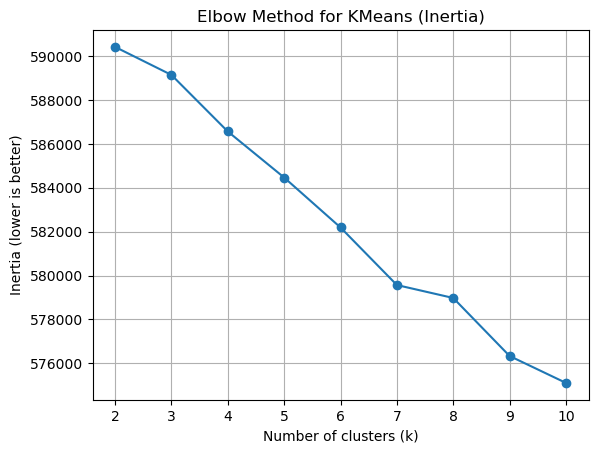

Chosen k for KMeans (analysis): 7


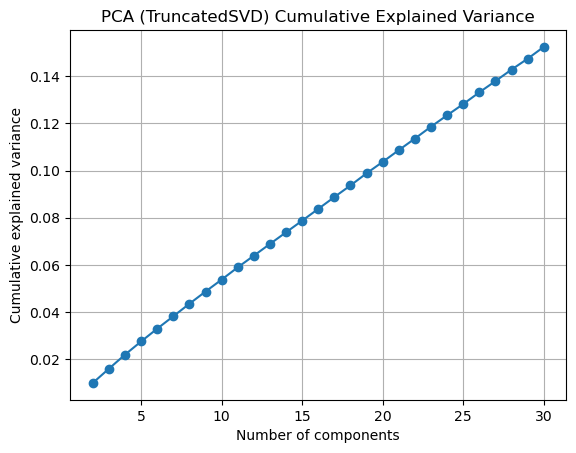

Chosen PCA components (analysis): 30
Original feature shape: (1452, 408)
After FE feature shape: (1452, 439)

After (KMeans + PCA added, analysis only)
R2: 0.8248
MAE: 117.1918
RMSE: 181.6542


,Stage,R2,MAE,RMSE
0,"Before (Final model, original features)",0.8231,116.2162,182.5175
1,"After (KMeans + PCA added, analysis only)",0.8248,117.1918,181.6542



Model kept for final use: final_model (original features) — this FE section is analysis only, not saved.


In [ ]:
# Further Feature Engineering (KMeans + PCA) — Analysis only
# - Add KMeans cluster feature, then PCA components
# - Compare BEFORE vs AFTER in one table

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD  # PCA-like for sparse matrices
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy.sparse import hstack, csr_matrix

# Helper: evaluation
# -----------------------------
def eval_regression(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"Stage": name, "R2": r2, "MAE": mae, "RMSE": rmse}, y_pred



# BEFORE: Evaluate FINAL model on original features
before_row, y_pred_before = eval_regression(
    "Before (Final model, original features)",
    final_model,
    X_test_enc,
    y_test
)

print("Before (Final model, original features)")
print("R2:", round(before_row["R2"], 4))
print("MAE:", round(before_row["MAE"], 4))
print("RMSE:", round(before_row["RMSE"], 4))


# KMeans Feature Engineering (Clusters)
# - Fit KMeans on scaled encoded features (train)
# - Make elbow plot (inertia) for analysis
# - Add cluster label as a new feature
# Scale features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

# ---- Elbow method (inertia) ----
k_values = list(range(2, 11))
inertias = []

for k in k_values:
    km = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        batch_size=1024,
        n_init=10
    )
    km.fit(X_train_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method for KMeans (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (lower is better)")
plt.grid(True)
plt.show()

# Choose k (simple elbow heuristic)
# picks k where improvement starts to slow down
drops = np.diff(inertias) 
drop_strength = np.abs(drops)
if len(drop_strength) >= 2:
    ratios = drop_strength[1:] / (drop_strength[:-1] + 1e-9)
    # find first point where improvement slows a lot
    idx = np.where(ratios < 0.65)[0]
    chosen_k = k_values[idx[0] + 1] if len(idx) > 0 else 4
else:
    chosen_k = 4

print("Chosen k for KMeans (analysis):", chosen_k)

# Fit final KMeans using chosen k
kmeans = MiniBatchKMeans(
    n_clusters=chosen_k,
    random_state=42,
    batch_size=1024,
    n_init=10
)
kmeans.fit(X_train_scaled)

# Cluster labels as a numeric feature column 
train_cluster = kmeans.predict(X_train_scaled).reshape(-1, 1)
test_cluster = kmeans.predict(X_test_scaled).reshape(-1, 1)

# Convert to sparse so we can hstack with sparse encoded matrix
train_cluster_sp = csr_matrix(train_cluster)
test_cluster_sp = csr_matrix(test_cluster)

# PCA Feature Engineering 
# - Plot cumulative explained variance
# - Choose number of components to reach ~95% variance
# - Add PCA components as extra features

max_components = min(50, X_train_scaled.shape[1] - 1) if X_train_scaled.shape[1] > 2 else 2
test_components_range = list(range(2, max(3, min(31, max_components + 1))))

cum_vars = []
svd_models = []

for n in test_components_range:
    svd = TruncatedSVD(n_components=n, random_state=42)
    svd.fit(X_train_scaled)
    cum_vars.append(svd.explained_variance_ratio_.sum())
    svd_models.append(svd)

plt.figure()
plt.plot(test_components_range, cum_vars, marker="o")
plt.title("PCA (TruncatedSVD) Cumulative Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.show()

# Choose smallest n that reaches 95%
target_var = 0.95
chosen_n = None
for n, cv in zip(test_components_range, cum_vars):
    if cv >= target_var:
        chosen_n = n
        break
if chosen_n is None:
    chosen_n = test_components_range[-1]

print("Chosen PCA components (analysis):", chosen_n)

svd_final = TruncatedSVD(n_components=chosen_n, random_state=42)
X_train_pca = svd_final.fit_transform(X_train_scaled)
X_test_pca = svd_final.transform(X_test_scaled)

# Convert PCA features to sparse for stacking
X_train_pca_sp = csr_matrix(X_train_pca)
X_test_pca_sp = csr_matrix(X_test_pca)

# Combine features (Original + KMeans + PCA)
X_train_fe = hstack([X_train_enc, train_cluster_sp, X_train_pca_sp], format="csr")
X_test_fe = hstack([X_test_enc, test_cluster_sp, X_test_pca_sp], format="csr")

print("Original feature shape:", X_train_enc.shape)
print("After FE feature shape:", X_train_fe.shape)

# AFTER: Train a CLONED copy of final_model on engineered features
# analysis only 
final_model_fe = clone(final_model)
final_model_fe.fit(X_train_fe, y_train)

after_row, y_pred_after = eval_regression(
    "After (KMeans + PCA added, analysis only)",
    final_model_fe,
    X_test_fe,
    y_test
)

print("\nAfter (KMeans + PCA added, analysis only)")
print("R2:", round(after_row["R2"], 4))
print("MAE:", round(after_row["MAE"], 4))
print("RMSE:", round(after_row["RMSE"], 4))

# BEFORE vs AFTER table (further feature engineering)
compare_df = pd.DataFrame([before_row, after_row])
compare_df[["R2", "MAE", "RMSE"]] = compare_df[["R2", "MAE", "RMSE"]].round(4)
display(compare_df)

# I KEEP the original final_model for deployment because this section is analysis only.
print("\nModel kept for final use: final_model (original features) — this FE section is analysis only, not saved.")


We first evaluate the **final saved model (final_model.pkl)** using the original features to create a baseline, so we can fairly compare whether KMeans + PCA adds value. Then we run **KMeans** and use the **elbow plot** to justify a sensible number of clusters (i chose **k = 7**), because cluster labels can capture “phone segments” (e.g., budget vs flagship patterns) that the raw features may not express cleanly. Next we apply **TruncatedSVD (PCA-style)** and use the cumulative explained variance plot to justify the number of components (**30**) this compresses high-dimensional one-hot features into a smaller set of pattern features, and the shape check confirms features were added correctly (**408 → 439 columns**) without breaking row alignment.

Your results show a **small trade-off**: after adding KMeans + PCA (analysis only), **R² slightly increased (0.8231 → 0.8248)** and **RMSE decreased (182.52 → 181.65)**, meaning the model explains price variation a bit better and reduces some large errors; however **MAE slightly increased (116.22 → 117.19)**, meaning average error got a little worse. Because the improvement is tiny and not consistently better across all metrics, you **kept the deployed model as `final_model.pkl`**, and treated KMeans + PCA strictly as **analysis** (not saved/not deployed), exactly as required.

Even though segmentation features slightly improved R²/RMSE, the gains are small and inconsistent, so deploying this would add complexity without clear business payoff.
